# Create histograms with the volume data, that show the distribuition



### Import dependencies

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
# !pip install openpyxl 

     ------------------------------------ 250.0/250.0 kB 450.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Read excel file, Absorption_Analysis

In [3]:
db = pd.read_excel("Absorption_Analysis_Cleaned.xlsx") # uncomment code in cell above if pandas can't read the file 
db.head()

,framenum,color,pos_x,pos_y,CV,Normal Distribution,area,x_length,y_length,meanPXbgFromfg,meanPXfg
0,4389,red,129,206,478.612250,0.000010,3013.0,73,53,0,191.305538
1,6166,red,115,812,494.388525,0.000015,3106.5,82,48,0,195.017155
2,4308,red,92,568,499.869536,0.000018,3148.5,79,51,0,189.679199
3,6575,red,107,192,507.389792,0.000022,3192.0,75,54,0,198.644769
4,5548,red,108,245,516.747092,0.000028,3255.0,79,53,0,192.003579


### Extract cell volumes from database

In [4]:
cv = db["CV"]
cv.head()

0    478.612250
1    494.388525
2    499.869536
3    507.389792
4    516.747092
Name: CV, dtype: float64

### Fit a normal distribution to the data
 Adapted from @author: Prof. Dr. Cédric Bessire

In [5]:
print(type(cv))
cv = cv.to_numpy()
print(type(cv))
mean, std = norm.fit(cv)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


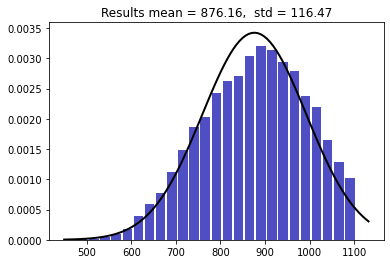

In [6]:
plt.hist(cv, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Results mean = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()